In [114]:
import pandas as pd
import numpy as np 
from datetime import datetime, date
import plotly as pt
import ast
import holidays
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, model_selection, linear_model
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_curve, auc,accuracy_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score,confusion_matrix,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib

<center> 

# 1.0 Preprocesamiento de los datos </center>

<center>

## 1.1 Vistazo inicial del dataset
</center>

In [2]:
#Importacion del dataset
df = pd.read_csv('incidentes_viales.csv', sep=';', encoding='utf-8')
df.head()

C:\Users\pixel\AppData\Local\Temp\ipykernel_23444\2719112179.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('incidentes_viales.csv', sep=';', encoding='utf-8')


,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
0,2015,1013,Caida Ocupante,CR 46 CL 43,CR 046 043 000 00000,Tramo de via,A000259731,21/10/2015 05:58:00,2015-10-21T10:58:00.000Z,Con heridos,10,1508668,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]",834949.69,1182357.34
1,2015,1020,Choque,CR 43 A CL 29,CR 043 A 029 000 00000,Tramo de via,A000261725,05/11/2015 03:00:00,2015-11-05T08:00:00.000Z,Solo daños,11,1510621,10,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]",834880.17,1180762.02
2,2015,0205,Otro,CR 46 CL 37,CR 046 037 000 00000,Tramo de via,A000259739,21/10/2015 07:40:00,2015-10-21T12:40:00.000Z,Con heridos,10,1508691,02,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]",837004.94,1188499.17
3,2015,0101,Atropello,CR 34 CL 112,CR 034 112 000 00000,Tramo de via,A000259752,21/10/2015 12:00:00,2015-10-21T17:00:00.000Z,Con heridos,10,1508694,01,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]",837688.53,1188663.05
4,2015,1504,Choque,CR 50 CL 14,CR 050 014 000 00000,Tramo de via,A000259949,03/11/2015 06:16:00,2015-11-03T11:16:00.000Z,Solo daños,11,1510634,15,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]",833903.11,1179469.60


In [3]:
#Tamaño del dataset
df.shape

(270765, 18)

In [4]:
#Verificar el tipo de datos por variable
df.dtypes

AÑO                       object
CBML                      object
CLASE_ACCIDENTE           object
DIRECCION                 object
DIRECCION ENCASILLADA     object
DISEÑO                    object
EXPEDIENTE                object
FECHA_ACCIDENTE           object
FECHA_ACCIDENTES          object
GRAVEDAD_ACCIDENTE        object
MES                        int64
NRO_RADICADO              object
NUMCOMUNA                 object
BARRIO                    object
COMUNA                    object
LOCATION                  object
X                        float64
Y                        float64
dtype: object

In [5]:
#Verificar si hay valores nulos y cuantos hay por variable
df.isnull().sum()

AÑO                          0
CBML                     18156
CLASE_ACCIDENTE              6
DIRECCION                    0
DIRECCION ENCASILLADA      391
DISEÑO                    1148
EXPEDIENTE                 110
FECHA_ACCIDENTE              0
FECHA_ACCIDENTES             0
GRAVEDAD_ACCIDENTE           0
MES                          0
NRO_RADICADO                 5
NUMCOMUNA                    0
BARRIO                   19006
COMUNA                   12798
LOCATION                     0
X                            0
Y                            0
dtype: int64

In [6]:
#Verificar si hay registros duplicados
df[df.duplicated()]

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
107212,2017,0206,Choque,CR 52 CL 107,CR 052 107 000 00000,NaN,A000673223,25/12/2017 10:00:00,2017-12-25T15:00:00.000Z,Con muertos,12,62196,02,Andalucía,Santa Cruz,"[-75.5574464031, 6.29966255324]",836224.31,1188608.41
266852,2016,1018,Atropello,CL 58 CR 50,CL 058 050 000 00000,NaN,A000487308,20/11/2016 02:05:00,2016-11-20T07:05:00.000Z,Con muertos,11,58560,10,Villa Nueva,La Candelaria,"[-75.5642900962, 6.25591991287]",835453.06,1183771.57
270449,2015,80003360020,Choque,CR 63 CL 50 C Sur 09,CR 063 S 050 C 009 00000,NaN,A000177042,13/05/2015 18:31:00,2015-05-13T23:31:00.000Z,Con muertos,5,050016000206201523690,80,Cabecera San Antonio de Prado,Corregimiento de San Antonio de Prado,"[-75.6448608945, 6.17708308094]",826508.06,1175075.92


In [7]:
#Eliminar registros duplicados
df.drop_duplicates(inplace=True)

In [8]:
#Valores unicos por variable
df.nunique()

AÑO                          14
CBML                        842
CLASE_ACCIDENTE               9
DIRECCION                 39285
DIRECCION ENCASILLADA     35360
DISEÑO                       13
EXPEDIENTE               270152
FECHA_ACCIDENTE          176043
FECHA_ACCIDENTES         176043
GRAVEDAD_ACCIDENTE            4
MES                          12
NRO_RADICADO             270730
NUMCOMUNA                    35
BARRIO                      490
COMUNA                       31
LOCATION                  26868
X                         26072
Y                         26380
dtype: int64

In [9]:
df.NUMCOMUNA.unique()

array(['10', '02', '01', '15', '14', '11', '07', '06', '04', '09', '05',
       '80', 'Sin Inf', '13', '08', '16', '03', '12', '70', '60', '90',
       'In', 'SN', '0', '50', 'AU', '5', '7', '9', '4', '3', '1', '2',
       '8', '6'], dtype=object)

<center>

## 1.2 Eliminacion de variables  
</center>

#### Se eliminaran aquellas variables que no tengan ningun tipo de relacion con nuestro objetivo o que tengan la misma informacion que otras pariables pero menos comunicativas 

In [10]:
#Eliminar variables que no se van a utilizar
df.drop(
  axis=1, columns=["CBML", "DIRECCION ENCASILLADA", "EXPEDIENTE", "FECHA_ACCIDENTES", "NRO_RADICADO", "X", "Y"], 
  inplace=True
)

In [11]:
#Mostrar el dataset sin las variables eliminadas
df.head()

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,NUMCOMUNA,BARRIO,COMUNA,LOCATION
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,21/10/2015 05:58:00,Con heridos,10,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]"
1,2015,Choque,CR 43 A CL 29,Tramo de via,05/11/2015 03:00:00,Solo daños,11,10,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]"
2,2015,Otro,CR 46 CL 37,Tramo de via,21/10/2015 07:40:00,Con heridos,10,02,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]"
3,2015,Atropello,CR 34 CL 112,Tramo de via,21/10/2015 12:00:00,Con heridos,10,01,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]"
4,2015,Choque,CR 50 CL 14,Tramo de via,03/11/2015 06:16:00,Solo daños,11,15,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]"


<center>

## 1.4 Estandarizacion de valores por variable
</center>

### 1.4.1 Variable: Año

In [12]:
#Verificar los valores unicos de la variable AÑO 
df.AÑO.unique()

array(['2015', '2014', '2016', '2017', '2018', '2019\\r', '2019', '2020',
       2020, 2015, 2014, 2016, 2017, 2018], dtype=object)

In [13]:
#Estandarizar estos valores
df.AÑO.replace({
  2014: '2014',
  2015: '2015',
  2016: '2016',
  2017: '2017',
  2018: '2018', 
  2019: '2019', 
  2020: '2020',
  '2019\\r': '2019'
}, inplace=True)

In [14]:
#Verificar la estandarizacion
df.AÑO.unique()

array(['2015', '2014', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

### 1.4.2 Variable: Clase de accidente

In [15]:
#Eliminar valores nulos de la variable CLASE_ACCIDENTE
df.dropna(subset=['CLASE_ACCIDENTE'], inplace=True)

In [16]:
#Verificar los valores unicos de la variable CLASE_ACCIDENTE
df.CLASE_ACCIDENTE.unique() 

array(['Caida Ocupante', 'Choque', 'Otro', 'Atropello', 'Volcamiento',
       'Caída de Ocupante', 'Caída Ocupante', 'Incendio',
       'Caida de Ocupante'], dtype=object)

In [17]:
#Estandarizar estos valores
df.CLASE_ACCIDENTE.replace({
  'Caída de Ocupante': 'Caida Ocupante',
  'Caída Ocupante': 'Caida Ocupante',
  'Caida de Ocupante': 'Caida Ocupante',
}, inplace=True)

In [18]:
#Verificar la estandarizacion
df.CLASE_ACCIDENTE.unique()

array(['Caida Ocupante', 'Choque', 'Otro', 'Atropello', 'Volcamiento',
       'Incendio'], dtype=object)

### 1.4.3 Variable: Diseño

In [19]:
#Eliminar valores nulos de la variable DISEÑO 
df.dropna(subset='DISEÑO', inplace=True)

In [20]:
#Verificar los valores unicos de la variable DISEÑO 
df.DISEÑO.unique()

array(['Tramo de via', 'Interseccion', 'Glorieta', 'Lote o Predio',
       'Paso a Nivel', 'Puente', 'Paso Elevado', 'Ciclo Ruta',
       'Paso Inferior', 'Via peatonal', 'Pontón', 'Tunel', 'Pont\\xF3n'],
      dtype=object)

In [21]:
#Estandarizar estos valores
df.DISEÑO.replace({
  'Pont\\xF3n': 'Pontón'
}, inplace=True) 

In [22]:
#Verificar la estandarizacion
df.DISEÑO.unique()

array(['Tramo de via', 'Interseccion', 'Glorieta', 'Lote o Predio',
       'Paso a Nivel', 'Puente', 'Paso Elevado', 'Ciclo Ruta',
       'Paso Inferior', 'Via peatonal', 'Pontón', 'Tunel'], dtype=object)

In [112]:
value_counts = df['CLASE_ACCIDENTE'].value_counts()

In [113]:
print(value_counts)

CLASE_ACCIDENTE
2.0    168787
4.0     26708
0.0     23476
1.0     21501
5.0      9056
3.0        28
Name: count, dtype: int64


### 1.4.4 Variable: Gravedad del accidente

In [23]:
#Verificar los valores unicos de la variable Gravedad del accidente
df.GRAVEDAD_ACCIDENTE.unique()

array(['Con heridos', 'Solo daños', 'Solo da\\xF1os', 'Con muertos'],
      dtype=object)

In [24]:
#Estandarizas estos valores
df.GRAVEDAD_ACCIDENTE.replace({
  'Solo da\\xF1os': 'Solo daños',
}, inplace=True)

In [25]:
#Verificar la estandarizacion
df.GRAVEDAD_ACCIDENTE.unique()

array(['Con heridos', 'Solo daños', 'Con muertos'], dtype=object)

### 1.4.5 Variable: Barrio

In [26]:
df.dropna(subset=['BARRIO'], inplace=True)

In [27]:
df.shape

(250690, 11)

In [28]:
df.isna().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DIRECCION             0
DISEÑO                0
FECHA_ACCIDENTE       0
GRAVEDAD_ACCIDENTE    0
MES                   0
NUMCOMUNA             0
BARRIO                0
COMUNA                0
LOCATION              0
dtype: int64

### 1.4.6 Variable: Numero de la comuna

In [29]:
#Verificar los valores unicos de la variable NUMCOMUNA
df.NUMCOMUNA.unique()

array(['10', '02', '01', '15', '14', '11', '07', '06', '04', '09', '05',
       '80', '13', '08', '16', '03', '12', '70', '60', '90', 'In', 'SN',
       '0', '50', 'AU', '5', '7', '9', '4', '3', '1', '2', '8', '6',
       'Sin Inf'], dtype=object)

In [30]:
#Estandarizar estos valores
df.NUMCOMUNA.replace({
  'In': np.nan,
  'SN': np.nan,
  'AU': np.nan,
  'Sin Inf': np.nan,
  '0': np.nan,
  '01': '1',
  '02': '2',
  '03': '3',
  '04': '4',
  '05': '5',
  '06': '6',
  '07': '7',
  '08': '8',
  '09': '9',
}, inplace=True)

In [31]:
#Eliminar valores nulos creado en la estandarizacion
df.dropna(subset=['NUMCOMUNA'], inplace=True)

In [32]:
#Verificar la estandarizacion
df.NUMCOMUNA.unique()

array(['10', '2', '1', '15', '14', '11', '7', '6', '4', '9', '5', '80',
       '13', '8', '16', '3', '12', '70', '60', '90', '50'], dtype=object)

### 1.4.7 Variable: Comuna

In [33]:
#Verificar los valores unicos de la variable COMUNA
df.COMUNA.unique()

array(['La Candelaria', 'Santa Cruz', 'Popular', 'Guayabal', 'El Poblado',
       'Laureles Estadio', 'Robledo', 'Doce de Octubre', 'Aranjuez',
       'Buenos Aires', 'Castilla',
       'Corregimiento de San Antonio de Prado', 'San Javier',
       'Villa Hermosa', 'Belén', 'Manrique', 'La América',
       'Corregimiento de Altavista', 'Corregimiento de San Cristóbal',
       'Corregimiento de Santa Elena', 'In',
       'Corregimiento de San Sebastián de Palmitas', 'Bel\\xE9n',
       'La Am\\xE9rica', 'Corregimiento de San Crist\\xF3bal',
       'Corregimiento de San Sebasti\\xE1n de Palmitas', 'AU'],
      dtype=object)

In [34]:
#Estandarizar estos valores
df.COMUNA.replace({
  'Corregimiento de San Crist\\xF3bal': 'Corregimiento de San Cristóbal',
  'Corregimiento de San Sebasti\\xE1n de Palmitas': 'Corregimiento de San Sebastián de Palmitas',
  'La Am\\xE9rica': 'La América',
  'AU': np.nan,
  'In': np.nan,
  'Bel\\xE9n': 'Belén',
}, inplace=True)

In [35]:
#Verificar la estandarizacion
df.COMUNA.unique()

array(['La Candelaria', 'Santa Cruz', 'Popular', 'Guayabal', 'El Poblado',
       'Laureles Estadio', 'Robledo', 'Doce de Octubre', 'Aranjuez',
       'Buenos Aires', 'Castilla',
       'Corregimiento de San Antonio de Prado', 'San Javier',
       'Villa Hermosa', 'Belén', 'Manrique', 'La América',
       'Corregimiento de Altavista', 'Corregimiento de San Cristóbal',
       'Corregimiento de Santa Elena', nan,
       'Corregimiento de San Sebastián de Palmitas'], dtype=object)

#### 1.4.7.1 Imputacion de datos para la variable COMUNA

##### Al tener una variable llamada NUMCOMUNA y esta estar directamente relacionado con la variable COMUNA, podemos imputar los datos faltantes usando esta informacion 

In [36]:
#Creacion de diccionario con el numero de comuna y su respectivo nombre
dict_comuna = {
  '1': 'Popular',
  '2': 'Santa Cruz',
  '3': 'Manrique',
  '4': 'Aranjuez',
  '5': 'Castilla',
  '6': 'Doce de Octubre',
  '7': 'Robledo',
  '8': 'Villa Hermosa',
  '9': 'Buenos Aires',
  '10': 'La Candelaria',
  '11': 'Laureles Estadio',
  '12': 'La América',
  '13': 'San Javier',
  '14': 'El Poblado',
  '15': 'Guayabal',
  '16': 'Belén',
  '50': 'Corregimiento de San Sebastián de Palmitas',
  '60': 'Corregimiento de San Cristóbal',
  '70': 'Corregimiento de Altavista',
  '80': 'Corregimiento de San Antonio de Prado',
  '90': 'Corregimiento de Santa Elena',
}

In [37]:
#Aplicacion del diccionario a la variable COMUNA
df['COMUNA'] = df['NUMCOMUNA'].apply(lambda x: dict_comuna[x])

In [38]:
#Verificar que no hay valores nulos en la variable COMUNA
df.COMUNA.isna().sum()  

0

#### 1.4.7.2 Eliminar variable numero de comuna 

In [39]:
#Eliminar la variable NUMCOMUNA
df.drop(columns=['NUMCOMUNA'], inplace=True)

In [40]:
#verificar que la variable NUMCOMUNA haya sido eliminada correctamente
df.head()

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,BARRIO,COMUNA,LOCATION
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,21/10/2015 05:58:00,Con heridos,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]"
1,2015,Choque,CR 43 A CL 29,Tramo de via,05/11/2015 03:00:00,Solo daños,11,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]"
2,2015,Otro,CR 46 CL 37,Tramo de via,21/10/2015 07:40:00,Con heridos,10,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]"
3,2015,Atropello,CR 34 CL 112,Tramo de via,21/10/2015 12:00:00,Con heridos,10,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]"
4,2015,Choque,CR 50 CL 14,Tramo de via,03/11/2015 06:16:00,Solo daños,11,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]"


<center>

## 1.5 Creacion de nuevas variables mediante extracion de datos de variables existentes
</center>

### 1.5.1 Separacion de la variable FECHA_ACCIDENTE en las nuevas variables FECHA, SEMANA, DIA y HORA

In [41]:
#Extaccion de los datos de la variable FECHA_ACCIDENTE
fechas_horas = df.FECHA_ACCIDENTE.values
fechas = []
horas = []
for i in fechas_horas:
  fechas.append(i.split(' ')[0])
  horas.append(i.split(' ')[1])

In [42]:
#Creacion de la variable FECHA
df['FECHA'] = fechas

In [43]:
#Creacion de la variable SEMANA
semana = []

for i in fechas:
  semana.append(datetime.strptime(i, '%d/%m/%Y').strftime('%U'))
  
df['SEMANA'] = semana

In [44]:
#Creacion de la variable DIA_SEMANA
dict_dia = {
  'Monday': 'Lunes',
  'Tuesday': 'Martes',
  'Wednesday': 'Miercoles',
  'Thursday': 'Jueves',
  'Friday': 'Viernes',
  'Saturday': 'Sabado',
  'Sunday': 'Domingo',
}

dia_semana = []

for i in fechas:
  dia_semana.append(dict_dia[datetime.strptime(i, '%d/%m/%Y').strftime('%A')])

df['DIA_SEMANA'] = dia_semana

In [45]:
#Creacion de la variable HORA
df['HORA'] = horas

In [46]:
#Eliminar la variable FECHA_ACCIDENTE
df.drop(columns=['FECHA_ACCIDENTE'], inplace=True)

In [47]:
#Verificar que las variables se hayan creado correctamente
df[['FECHA', 'SEMANA', 'DIA_SEMANA', 'HORA']].head()

,FECHA,SEMANA,DIA_SEMANA,HORA
0,21/10/2015,42,Miercoles,05:58:00
1,05/11/2015,44,Jueves,03:00:00
2,21/10/2015,42,Miercoles,07:40:00
3,21/10/2015,42,Miercoles,12:00:00
4,03/11/2015,44,Martes,06:16:00


In [48]:
#Verificar que no ha habido perdida de datos
df.shape

(249556, 13)

In [49]:
#Verificar que no hay valores nulos en las nuevas variables
df.isna().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DIRECCION             0
DISEÑO                0
GRAVEDAD_ACCIDENTE    0
MES                   0
BARRIO                0
COMUNA                0
LOCATION              0
FECHA                 0
SEMANA                0
DIA_SEMANA            0
HORA                  0
dtype: int64

### 1.5.2 Separacion de la variable LOCATION en las nuevas variables LATITUD Y LONGITUD

In [50]:
#Extraccion de los datos de la variable LOCATION
location = df.LOCATION.values

In [51]:
#Extraccion de los datos de la variable LOCATION
location = [ast.literal_eval(i) for i in location]

In [52]:
#Creacion de las variables LATITUD y LONGITUD
latitud = []
longitud = []

for i, j in location:
  longitud.append(i)
  latitud.append(j)
  
df['LATITUD'] = latitud
df['LONGITUD'] = longitud

In [53]:
#Eliminar la variable LOCATION
df.drop(columns=['LOCATION'], inplace=True)

In [54]:
#Verificar que las variables se hayan creado correctamente
df[['LATITUD', 'LONGITUD']].head()

,LATITUD,LONGITUD
0,6.243123,-75.568801
1,6.228700,-75.569388
2,6.298695,-75.550391
3,6.300194,-75.544220
4,6.216992,-75.578181


In [55]:
#Verificar que no ha habido perdida de datos
df.shape

(249556, 14)

In [56]:
#Verificar que no hay valores nulos en las nuevas variables
df.isna().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DIRECCION             0
DISEÑO                0
GRAVEDAD_ACCIDENTE    0
MES                   0
BARRIO                0
COMUNA                0
FECHA                 0
SEMANA                0
DIA_SEMANA            0
HORA                  0
LATITUD               0
LONGITUD              0
dtype: int64

### 1.5.3 Creacion de la variable fechas festivas

In [57]:
#Uso de la libreria holidays para identificar los dias festivos en Colombia
dias_festivos = holidays.country_holidays('CO', years=[2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [58]:
#Formateo de la variable FECHA para que sea reconocida por la libreria holidays
fechas_formateadas = [datetime.strptime(i, '%d/%m/%Y').strftime("%Y/%m/%d") for i in fechas]

In [59]:
#extraccion de las fechas festivas en el dataset 
fechas_festivas_extraidas = []

for i in fechas_formateadas:
  if i in dias_festivos:
    if i not in fechas_festivas_extraidas:
      fechas_festivas_extraidas.append(i)

In [60]:
#Formateo de la variable fechas_festivas_extraidas para que concuerde con el dataset
fechas_festivas_extraidas = [datetime.strptime(i, '%Y/%m/%d').strftime("%d/%m/%Y") for i in fechas_festivas_extraidas]

In [61]:
#Automatizar la creacion de fechas festivas que no son marcadas por la libreria holidays para cada año
years=["2014", "2015", "2016", "2017", "2018", "2019", "2020"]
fechas_sin_año = ["31/12", "24/12", "31/10", "16/09", "07/12"]

fechas_festivas = {}

for i in years:
  for j in fechas_sin_año:
    fechas_festivas[j + '/' + i] = 'Fecha Festiva'


In [62]:
#Agregar las otras fechas festivas al diccionario
for i in fechas_festivas_extraidas:
  fechas_festivas[i] = 'Fecha Festiva'

In [63]:
#Creacion de la variable FECHA_FESTIVA en el dataset
df['FECHA_FESTIVA'] = df['FECHA'].apply(lambda x: fechas_festivas[x] if x in fechas_festivas else 'Fecha Normal')

In [64]:
#Verificar que la variable fue creada correctamente
df[['FECHA', 'FECHA_FESTIVA']].head()

,FECHA,FECHA_FESTIVA
0,21/10/2015,Fecha Normal
1,05/11/2015,Fecha Normal
2,21/10/2015,Fecha Normal
3,21/10/2015,Fecha Normal
4,03/11/2015,Fecha Normal


In [65]:
#Verificar que no hay perdida de datos
df.shape

(249556, 15)

In [66]:
#Verificar que no hay valores nulos en la nueva variable
df.isna().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DIRECCION             0
DISEÑO                0
GRAVEDAD_ACCIDENTE    0
MES                   0
BARRIO                0
COMUNA                0
FECHA                 0
SEMANA                0
DIA_SEMANA            0
HORA                  0
LATITUD               0
LONGITUD              0
FECHA_FESTIVA         0
dtype: int64

In [67]:
#Vistazo al dataset procesado
df.head()

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,GRAVEDAD_ACCIDENTE,MES,BARRIO,COMUNA,FECHA,SEMANA,DIA_SEMANA,HORA,LATITUD,LONGITUD,FECHA_FESTIVA
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,Con heridos,10,Barrio Colón,La Candelaria,21/10/2015,42,Miercoles,05:58:00,6.243123,-75.568801,Fecha Normal
1,2015,Choque,CR 43 A CL 29,Tramo de via,Solo daños,11,San Diego,La Candelaria,05/11/2015,44,Jueves,03:00:00,6.228700,-75.569388,Fecha Normal
2,2015,Otro,CR 46 CL 37,Tramo de via,Con heridos,10,La Francia,Santa Cruz,21/10/2015,42,Miercoles,07:40:00,6.298695,-75.550391,Fecha Normal
3,2015,Atropello,CR 34 CL 112,Tramo de via,Con heridos,10,Santo Domingo Savio No. 1,Popular,21/10/2015,42,Miercoles,12:00:00,6.300194,-75.544220,Fecha Normal
4,2015,Choque,CR 50 CL 14,Tramo de via,Solo daños,11,Santa Fé,Guayabal,03/11/2015,44,Martes,06:16:00,6.216992,-75.578181,Fecha Normal


In [68]:
#Guardar el dataset procesado
df.to_csv('incidentes_viales_procesado.csv', sep=',', encoding='utf-8', index=False)

In [69]:
df.agg([min, max])

C:\Users\pixel\AppData\Local\Temp\ipykernel_23444\513285256.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'min' instead.
  df.agg([min, max])
C:\Users\pixel\AppData\Local\Temp\ipykernel_23444\513285256.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  df.agg([min, max])


,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,GRAVEDAD_ACCIDENTE,MES,BARRIO,COMUNA,FECHA,SEMANA,DIA_SEMANA,HORA,LATITUD,LONGITUD,FECHA_FESTIVA
min,2014,Atropello,Belén Aguas Frías - El Astillero,Ciclo Ruta,Con heridos,1,0,Aranjuez,01/01/2015,00,Domingo,00:00:00,6.166626,-75.703776,Fecha Festiva
max,2020,Volcamiento,Vía Las Palmas Km 10 + 900,Via peatonal,Solo daños,12,Área de Expansión San Antonio de Prado,Villa Hermosa,31/12/2019,53,Viernes,23:59:00,6.367985,-75.500234,Fecha Normal


<center>
    ## X.1 Modelado
<center>

In [70]:
encoder = OrdinalEncoder()

In [106]:
columnas_categoricas =['CLASE_ACCIDENTE', 'DISEÑO', 'COMUNA','FECHA_FESTIVA','DIA_SEMANA',"GRAVEDAD_ACCIDENTE"]
df[columnas_categoricas] = encoder.fit_transform(df[columnas_categoricas])

In [102]:
train_data = df[df['AÑO'] != '2020']
valid_data = df[df['AÑO'] == '2020']

## Modelo Anual 

In [107]:
columnas_seleccionadas = ['AÑO', 'CLASE_ACCIDENTE', 'DISEÑO', 'GRAVEDAD_ACCIDENTE', 'COMUNA', 'FECHA_FESTIVA','DIA_SEMANA']
df_anual = train_data[columnas_seleccionadas]
df_valid_anual=valid_data[columnas_seleccionadas]
# Crear un diccionario de mapeo

In [108]:
df_anual.head()

,AÑO,CLASE_ACCIDENTE,DISEÑO,GRAVEDAD_ACCIDENTE,COMUNA,FECHA_FESTIVA,DIA_SEMANA,BARRIO
0,2015,1.0,9.0,0.0,13.0,1.0,4.0,118.0
1,2015,2.0,9.0,2.0,13.0,1.0,1.0,386.0
2,2015,4.0,9.0,0.0,19.0,1.0,4.0,266.0
3,2015,0.0,9.0,0.0,16.0,1.0,4.0,425.0
4,2015,2.0,9.0,2.0,11.0,1.0,3.0,410.0


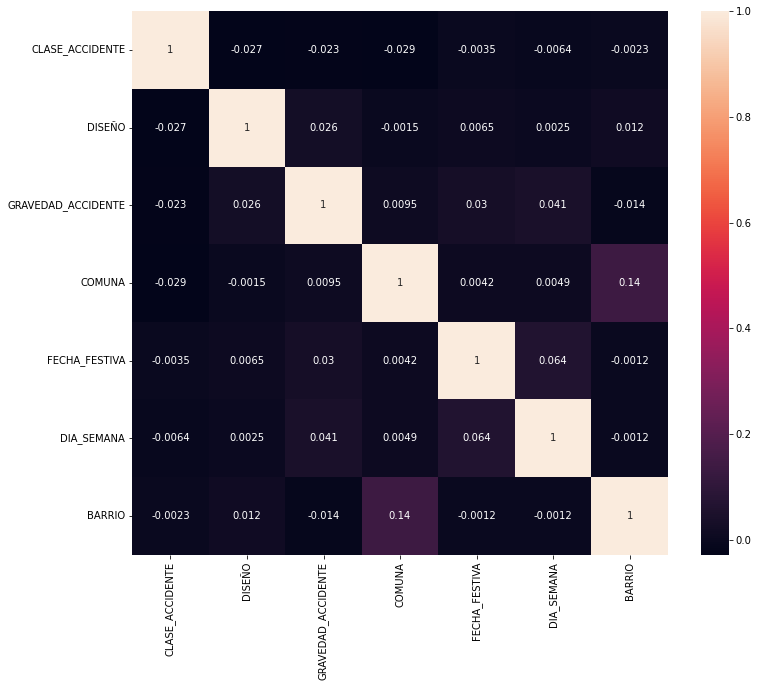

In [109]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_anual.corr(numeric_only=True), annot=True)
plt.show()

In [117]:
def entrenar_modelo_multi(dataf, target,valid):
# Paso 1: Preparar los datos
    X_train = dataf.drop(target, axis=1)
    y_train = dataf[[target]]
    X_valid = valid.drop(target, axis=1)
    y_valid = valid[[target]]

    # Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Paso 3: Crear y entrenar el modelo de regresión multioutput
    # En este ejemplo, se utiliza Random Forest como el regresor base
    regressor = RandomForestClassifier(n_estimators=100, random_state=42)
    multioutput_classifier = MultiOutputClassifier(regressor)
    multioutput_classifier.fit(X_train, y_train)

    # Paso 4: Evaluar el modelo
    y_pred = multioutput_classifier.predict(X_test)
    
    # Calcula la precisión para evaluar el rendimiento del modelo
    
    accuracy = accuracy_score(y_test, y_pred)

    # Calcula el Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Calcula el Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calcula el coeficiente de determinación R^2
    r2 = r2_score(y_test, y_pred)

    # Calcula la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualiza la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return {
        "Accuracy Score": accuracy,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    }

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version

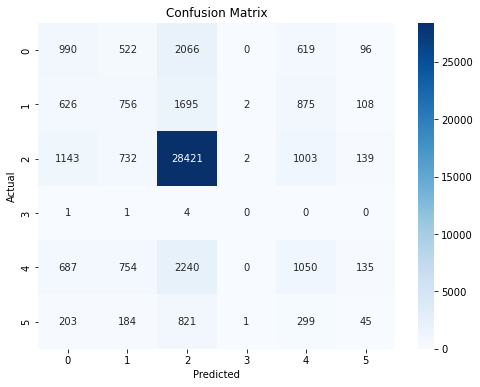

{'Accuracy Score': 0.6763738641280831, 'Mean Squared Error': 1.864820424058849, 'Mean Absolute Error': 0.7049762007788836, 'R^2 Score': -0.5781797964544357}


In [118]:
resultados = entrenar_modelo_multi(df_anual, 'CLASE_ACCIDENTE', df_valid_anual)
print(resultados)

## Modelo Mensual

In [76]:
columnas_seleccionadas = ['MES', 'CLASE_ACCIDENTE', 'DISEÑO', 'GRAVEDAD_ACCIDENTE', 'COMUNA', 'FECHA_FESTIVA','DIA_SEMANA']
df_mensual = train_data[columnas_seleccionadas]
df_valid_mensual=valid_data[columnas_seleccionadas]
# Crear un diccionario de mapeo
mapeo_gravedad = {'Solo daños': 1, 'Con heridos': 0, 'Con muertos': 0}  # Agrega todas las categorías que quieras mapear

# Aplicar el mapeo a la columna 'gravedad_accidente'
df_mensual['GRAVEDAD_ACCIDENTE'] = df_mensual['GRAVEDAD_ACCIDENTE'].map(mapeo_gravedad)
df_valid_mensual['GRAVEDAD_ACCIDENTE'] = df_valid_mensual['GRAVEDAD_ACCIDENTE'].map(mapeo_gravedad)

C:\Users\pixel\AppData\Local\Temp\ipykernel_23444\852693660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mensual['GRAVEDAD_ACCIDENTE'] = df_mensual['GRAVEDAD_ACCIDENTE'].map(mapeo_gravedad)
C:\Users\pixel\AppData\Local\Temp\ipykernel_23444\852693660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_mensual['GRAVEDAD_ACCIDENTE'] = df_valid_mensual['GRAVEDAD_ACCIDENTE'].map(mapeo_gravedad)


In [77]:
df_mensual.head()

,MES,CLASE_ACCIDENTE,DISEÑO,GRAVEDAD_ACCIDENTE,COMUNA,FECHA_FESTIVA,DIA_SEMANA
0,10,1.0,9.0,NaN,13.0,1.0,4.0
1,11,2.0,9.0,NaN,13.0,1.0,1.0
2,10,4.0,9.0,NaN,19.0,1.0,4.0
3,10,0.0,9.0,NaN,16.0,1.0,4.0
4,11,2.0,9.0,NaN,11.0,1.0,3.0


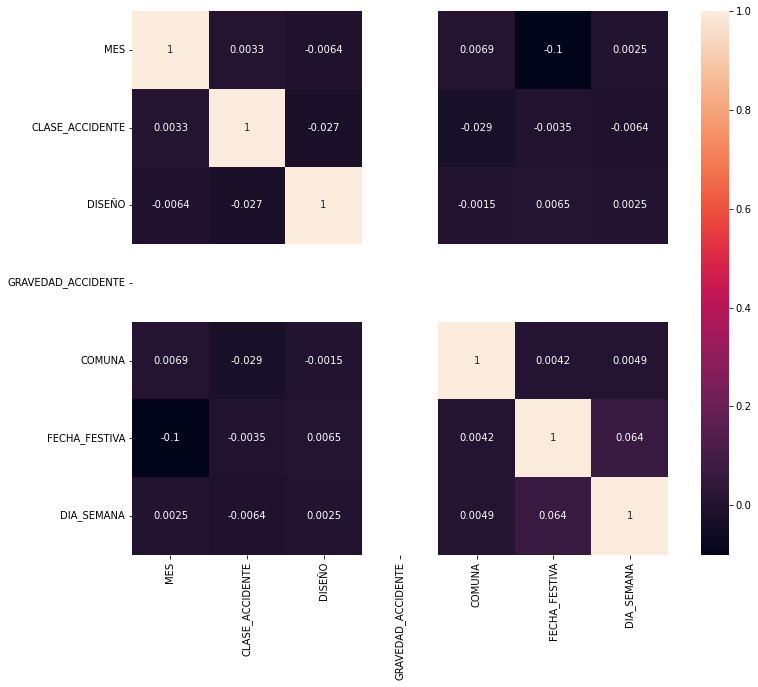

In [78]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_mensual.corr(numeric_only=True), annot=True)
plt.show()

## Modelo Semanal

In [79]:
columnas_seleccionadas = ['SEMANA', 'CLASE_ACCIDENTE', 'DISEÑO', 'GRAVEDAD_ACCIDENTE', 'COMUNA', 'FECHA_FESTIVA','DIA_SEMANA']
df_semanal = train_data[columnas_seleccionadas]
df_valid_semanal =valid_data[columnas_seleccionadas]
# Crear un diccionario de mapeo
mapeo_gravedad = {'Solo daños': 1, 'Con heridos': 0, 'Con muertos': 0}  # Agrega todas las categorías que quieras mapear

# Aplicar el mapeo a la columna 'gravedad_accidente'
df_semanal['GRAVEDAD_ACCIDENTE'] = df_semanal['GRAVEDAD_ACCIDENTE'].map(mapeo_gravedad)
df_valid_semanal['GRAVEDAD_ACCIDENTE'] = df_valid_semanal['GRAVEDAD_ACCIDENTE'].map(mapeo_gravedad)

C:\Users\pixel\AppData\Local\Temp\ipykernel_23444\2437127889.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_semanal['GRAVEDAD_ACCIDENTE'] = df_semanal['GRAVEDAD_ACCIDENTE'].map(mapeo_gravedad)
C:\Users\pixel\AppData\Local\Temp\ipykernel_23444\2437127889.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_semanal['GRAVEDAD_ACCIDENTE'] = df_valid_semanal['GRAVEDAD_ACCIDENTE'].map(mapeo_gravedad)


In [80]:
df_semanal.head()

,SEMANA,CLASE_ACCIDENTE,DISEÑO,GRAVEDAD_ACCIDENTE,COMUNA,FECHA_FESTIVA,DIA_SEMANA
0,42,1.0,9.0,NaN,13.0,1.0,4.0
1,44,2.0,9.0,NaN,13.0,1.0,1.0
2,42,4.0,9.0,NaN,19.0,1.0,4.0
3,42,0.0,9.0,NaN,16.0,1.0,4.0
4,44,2.0,9.0,NaN,11.0,1.0,3.0


In [81]:
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [82]:

def entrenar_modelo_logreg(dataf, target,valid, test_size=0.2, random_state=42):
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train = dataf.drop(target,axis=1).copy()
    y_train = dataf[target].copy()

    X_valid = valid.drop(target,axis=1).copy()
    y_valid = valid[target].copy()
    
    # Inicializar el modelo de regresión logística
    modelo = LogisticRegression()
    
    # Entrenar el modelo en los datos de entrenamiento
    modelo.fit(X_train, y_train)
    
    # Realizar predicciones en los datos de prueba
    predict=modelo.predict(X_valid)
    

    tn, fp, fn, tp = metrics.confusion_matrix(y_valid,predict).ravel()
    accuracy = (tp + tn) /(tp + tn + fn + fp)

    recall = tn / (tn + fp)

    precision = tp / (tp + fp)

    f1_score = (2*precision*recall)/(precision + recall)

    score=modelo.score(X_valid, y_valid)

    cm=metrics.confusion_matrix(y_valid, modelo.predict(X_valid))
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);


    result_str = f"Precision: {precision:.2f}, Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1_score:.2f}"

    return result_str

# Ejemplo de uso:
# Supongamos que tienes un DataFrame 'df' con características X y un objetivo y
# modelo, precisión = entrenar_modelo_predictivo(df[['feature1', 'feature2', 'feature3']], df['target'])
# print("Precisión del modelo:", precisión)

In [83]:
entrenar_modelo_logreg(df_anual,'GRAVEDAD_ACCIDENTE',df_valid_anual)

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


ValueError: too many values to unpack (expected 4)

In [ ]:


def entrenar_modelo_random_forest(dataf, target, valid, n_estimators=100, random_state=42):
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train = dataf.drop(target, axis=1).copy()
    y_train = dataf[target].copy()

    X_valid = valid.drop(target, axis=1).copy()
    y_valid = valid[target].copy()

    # Inicializar el modelo de Random Forest
    modelo = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    # Entrenar el modelo en los datos de entrenamiento
    modelo.fit(X_train, y_train)

    # Realizar predicciones en los datos de validación
    predict = modelo.predict(X_valid)

    tn, fp, fn, tp = metrics.confusion_matrix(y_valid, predict).ravel()
    accuracy = (tp + tn) / (tp + tn + fn + fp)

    recall = tn / (tn + fp)

    precision = tp / (tp + fp)

    f1_score = (2 * precision * recall) / (precision + recall)

    score = modelo.score(X_valid, y_valid)

    cm = metrics.confusion_matrix(y_valid, modelo.predict(X_valid))
    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size=15)

    result_str = f"Precision: {precision:.2f}, Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1_score:.2f}"

    return result_str

# Ejemplo de uso:
# result = entrenar_modelo_random_forest(dataframe_entrenamiento, 'target_column', dataframe_validacion)
# print(result)


c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version

'Precision: 0.64, Accuracy: 0.76, Recall: 0.67, F1 Score: 0.65'

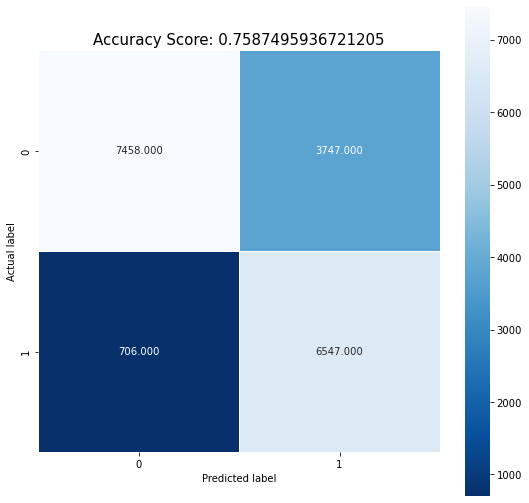

In [ ]:
entrenar_modelo_random_forest(df_anual,'GRAVEDAD_ACCIDENTE',df_valid_anual)